# Procesamiento Datos COVID-19 Sonora

Los datos utilizados para esta operación fueron obtenidos el día 27 de Mayo de 2020 del portal del gobierno dedicado a esos datos https://coronavirus.gob.mx/datos/.

El portal provee datos para casos confirmados por dia para cada estado.

## Obtención de datos de Sonora de la lista general de estados

In [2]:
# importamos las librerias necesarias para este cuaderno
import csv
import os
import matplotlib.pyplot as plt
from itertools import accumulate
import numpy as np
from sympy import Matrix, Number, init_printing, pprint
init_printing(use_unicode=True)

# Graficas mas grandes
plt.rcParams['figure.figsize'] = [10, 5]

current_dir =  os.path.abspath("")
file_path = os.path.join(current_dir, "casos-diarios-covid.csv")
datos_sonora = None

with open(file_path, newline="") as csv_file:
    csv_reader = csv.reader(csv_file)
    csv_reader = list(csv_reader)
    datos_sonora = csv_reader[26]
    
# Nos deshacemos de los headers

datos_sonora = datos_sonora[3:]

# Convertimos los elementos de la lista en numeros enteros

datos_sonora = list(map(int, datos_sonora))

print(datos_sonora)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 3, 4, 3, 1, 5, 4, 0, 1, 5, 1, 3, 1, 7, 2, 11, 10, 11, 5, 5, 5, 3, 16, 6, 13, 8, 10, 14, 7, 7, 14, 17, 6, 19, 9, 15, 32, 15, 18, 27, 22, 31, 26, 61, 52, 39, 38, 55, 43, 28, 61, 57, 94, 58, 89, 49, 58, 128, 87, 80, 67, 35, 7, 1, 0, 0, 0]


Se puede apreciar que el primer caso confirmado en Sonora fue registrado 63 días despues de la captura de datos del CONACYT, o el 15 de Marzo de 2020.

Por lo tanto nos deshacemos de los primeros 63 dias ya que no hubo actividad de infección confirmada durante esas fechas.

In [3]:
datos_sonora = datos_sonora[62:]
print(datos_sonora)

[1, 0, 1, 0, 0, 1, 1, 0, 3, 4, 3, 1, 5, 4, 0, 1, 5, 1, 3, 1, 7, 2, 11, 10, 11, 5, 5, 5, 3, 16, 6, 13, 8, 10, 14, 7, 7, 14, 17, 6, 19, 9, 15, 32, 15, 18, 27, 22, 31, 26, 61, 52, 39, 38, 55, 43, 28, 61, 57, 94, 58, 89, 49, 58, 128, 87, 80, 67, 35, 7, 1, 0, 0, 0]


Obtenemos el numero total de elementos de la lista y obtenemos división entera para conocer el numero total de semanas capturadas

In [4]:
num_semanas = len(datos_sonora) // 7
datos_sonora = datos_sonora[:(7 * num_semanas)]
print(datos_sonora)

[1, 0, 1, 0, 0, 1, 1, 0, 3, 4, 3, 1, 5, 4, 0, 1, 5, 1, 3, 1, 7, 2, 11, 10, 11, 5, 5, 5, 3, 16, 6, 13, 8, 10, 14, 7, 7, 14, 17, 6, 19, 9, 15, 32, 15, 18, 27, 22, 31, 26, 61, 52, 39, 38, 55, 43, 28, 61, 57, 94, 58, 89, 49, 58, 128, 87, 80, 67, 35, 7]


Estos datos cubren 70 días desde el 15 de Marzo hasta el 23 de Mayo de 2020

## Transformación de la lista a acumulado

In [5]:
datos_sonora = accumulate(datos_sonora)
datos_sonora = list(datos_sonora)

## Graficar datos acumulados

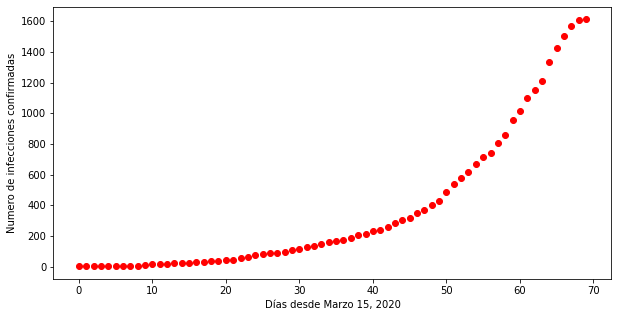

In [6]:
plt.plot(datos_sonora, 'ro')
plt.xlabel("Días desde Marzo 15, 2020")
plt.ylabel("Numero de infecciones confirmadas")
plt.show()

## Realizar ajuste por minimos cuadrados a ecuación de tercer orden

In [7]:
y_matrix = Matrix(datos_sonora)
y_matrix

⎡ 1  ⎤
⎢    ⎥
⎢ 1  ⎥
⎢    ⎥
⎢ 2  ⎥
⎢    ⎥
⎢ 2  ⎥
⎢    ⎥
⎢ 2  ⎥
⎢    ⎥
⎢ 3  ⎥
⎢    ⎥
⎢ 4  ⎥
⎢    ⎥
⎢ 4  ⎥
⎢    ⎥
⎢ 7  ⎥
⎢    ⎥
⎢ 11 ⎥
⎢    ⎥
⎢ 14 ⎥
⎢    ⎥
⎢ 15 ⎥
⎢    ⎥
⎢ 20 ⎥
⎢    ⎥
⎢ 24 ⎥
⎢    ⎥
⎢ 24 ⎥
⎢    ⎥
⎢ 25 ⎥
⎢    ⎥
⎢ 30 ⎥
⎢    ⎥
⎢ 31 ⎥
⎢    ⎥
⎢ 34 ⎥
⎢    ⎥
⎢ 35 ⎥
⎢    ⎥
⎢ 42 ⎥
⎢    ⎥
⎢ 44 ⎥
⎢    ⎥
⎢ 55 ⎥
⎢    ⎥
⎢ 65 ⎥
⎢    ⎥
⎢ 76 ⎥
⎢    ⎥
⎢ 81 ⎥
⎢    ⎥
⎢ 86 ⎥
⎢    ⎥
⎢ 91 ⎥
⎢    ⎥
⎢ 94 ⎥
⎢    ⎥
⎢110 ⎥
⎢    ⎥
⎢116 ⎥
⎢    ⎥
⎢129 ⎥
⎢    ⎥
⎢137 ⎥
⎢    ⎥
⎢147 ⎥
⎢    ⎥
⎢161 ⎥
⎢    ⎥
⎢168 ⎥
⎢    ⎥
⎢175 ⎥
⎢    ⎥
⎢189 ⎥
⎢    ⎥
⎢206 ⎥
⎢    ⎥
⎢212 ⎥
⎢    ⎥
⎢231 ⎥
⎢    ⎥
⎢240 ⎥
⎢    ⎥
⎢255 ⎥
⎢    ⎥
⎢287 ⎥
⎢    ⎥
⎢302 ⎥
⎢    ⎥
⎢320 ⎥
⎢    ⎥
⎢347 ⎥
⎢    ⎥
⎢369 ⎥
⎢    ⎥
⎢400 ⎥
⎢    ⎥
⎢426 ⎥
⎢    ⎥
⎢487 ⎥
⎢    ⎥
⎢539 ⎥
⎢    ⎥
⎢578 ⎥
⎢    ⎥
⎢616 ⎥
⎢    ⎥
⎢671 ⎥
⎢    ⎥
⎢714 ⎥
⎢    ⎥
⎢742 ⎥
⎢    ⎥
⎢803 ⎥
⎢    ⎥
⎢860 ⎥
⎢    ⎥
⎢954 ⎥
⎢    ⎥
⎢1012⎥
⎢    ⎥
⎢1101⎥
⎢    ⎥
⎢1150⎥
⎢    ⎥
⎢1208⎥
⎢    ⎥
⎢1336⎥
⎢    ⎥
⎢1423⎥
⎢    ⎥
⎢1503⎥
⎢    ⎥
⎢1570⎥
⎢    ⎥
⎢1605⎥
⎢    ⎥
⎣1612⎦

In [8]:
A_matrix = Matrix([[1, x, x**2, x**3] for x in range(0,70)])
A_matrix

⎡1  0    0      0   ⎤
⎢                   ⎥
⎢1  1    1      1   ⎥
⎢                   ⎥
⎢1  2    4      8   ⎥
⎢                   ⎥
⎢1  3    9      27  ⎥
⎢                   ⎥
⎢1  4    16     64  ⎥
⎢                   ⎥
⎢1  5    25    125  ⎥
⎢                   ⎥
⎢1  6    36    216  ⎥
⎢                   ⎥
⎢1  7    49    343  ⎥
⎢                   ⎥
⎢1  8    64    512  ⎥
⎢                   ⎥
⎢1  9    81    729  ⎥
⎢                   ⎥
⎢1  10  100    1000 ⎥
⎢                   ⎥
⎢1  11  121    1331 ⎥
⎢                   ⎥
⎢1  12  144    1728 ⎥
⎢                   ⎥
⎢1  13  169    2197 ⎥
⎢                   ⎥
⎢1  14  196    2744 ⎥
⎢                   ⎥
⎢1  15  225    3375 ⎥
⎢                   ⎥
⎢1  16  256    4096 ⎥
⎢                   ⎥
⎢1  17  289    4913 ⎥
⎢                   ⎥
⎢1  18  324    5832 ⎥
⎢                   ⎥
⎢1  19  361    6859 ⎥
⎢                   ⎥
⎢1  20  400    8000 ⎥
⎢                   ⎥
⎢1  21  441    9261 ⎥
⎢                   ⎥
⎢1  22  484   10648 ⎥
⎢         

In [9]:
A_matrix.T

⎡1  1  1  1   1    1    1    1    1    1    1     1     1     1     1     1   
⎢                                                                             
⎢0  1  2  3   4    5    6    7    8    9    10    11    12    13    14    15  
⎢                                                                             
⎢0  1  4  9   16  25   36   49   64   81   100   121   144   169   196   225  
⎢                                                                             
⎣0  1  8  27  64  125  216  343  512  729  1000  1331  1728  2197  2744  3375 

  1     1     1     1     1     1      1      1      1      1      1      1   
                                                                              
  16    17    18    19    20    21    22     23     24     25     26     27   
                                                                              
 256   289   324   361   400   441    484    529    576    625    676    729  
                                                   

In [10]:
A_matrix.T * A_matrix

⎡  70       2415       111895        5832225   ⎤
⎢                                              ⎥
⎢ 2415     111895      5832225      324249331  ⎥
⎢                                              ⎥
⎢111895    5832225    324249331    18777820425 ⎥
⎢                                              ⎥
⎣5832225  324249331  18777820425  1118505792835⎦

In [11]:
(A_matrix.T * A_matrix)**-1

⎡ 74643       -28985          139                    ⎤
⎢ ──────      ───────        ──────       -1/186588  ⎥
⎢ 362810      1306116        217686                  ⎥
⎢                                                    ⎥
⎢ -28985     675013555      -13325          28361    ⎥
⎢ ───────   ────────────   ─────────     ─────────── ⎥
⎢ 1306116   205297925112   123972177     29328275016 ⎥
⎢                                                    ⎥
⎢  139        -13325         85763                   ⎥
⎢ ──────     ─────────    ───────────   -5/141682488 ⎥
⎢ 217686     123972177    22810880568                ⎥
⎢                                                    ⎥
⎢              28361                                 ⎥
⎢-1/186588  ───────────   -5/141682488  5/14664137508⎥
⎣           29328275016                              ⎦

In [12]:
u_approx = ((A_matrix.T * A_matrix)**-1) * A_matrix.T * y_matrix
# convertir a cuatro puntos decimales
u_approx.xreplace({n : round(n, 4) for n in u_approx.atoms(Number)})

⎡-36.3333⎤
⎢        ⎥
⎢11.3484 ⎥
⎢        ⎥
⎢-0.5693 ⎥
⎢        ⎥
⎣ 0.0112 ⎦

Entonces la ecuación de tercer orden que mejor se ajusta a los datos de COVID-19 hasta el 23 de Mayo, 2020 es:

0.0112$x^{3}$-0.5693$x^{2}$+11.3484$x$-36.3333

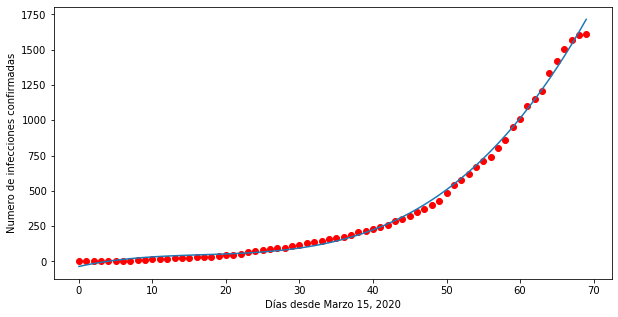

In [13]:
x = np.array(range(0,70))
x2 = np.array(range(0,70))
y2 = np.array(datos_sonora)
y = 0.0112 * x**3 - 0.5693 * x**2 + 11.3484 * x - 36.3333
plt.plot(x2,y2, 'ro')
plt.plot(x,y)
plt.xlabel("Días desde Marzo 15, 2020")
plt.ylabel("Numero de infecciones confirmadas")
plt.show()

In [14]:
x = 70
y = 0.0112 * x**3 - 0.5693 * x**2 + 11.3484 * x - 36.3333

# El valor real para el dia 70 despues del 15 de Marzo es 1613

real_value = 1613

error = (y - real_value) / real_value * 100

print(y, error)

1810.0846999999997 12.218518288902644


In [15]:
# crear un arreglo de pares ordenados para los datos
opairs_datos_sonora = [(i, datos_sonora[i]) for i in range(0, len(datos_sonora))]
# dividirlo en subarreglos de 7
opairs_datos_sonora = [opairs_datos_sonora[i:i + 7] for i in range(0,70, 7)]
print(opairs_datos_sonora)

[[(0, 1), (1, 1), (2, 2), (3, 2), (4, 2), (5, 3), (6, 4)], [(7, 4), (8, 7), (9, 11), (10, 14), (11, 15), (12, 20), (13, 24)], [(14, 24), (15, 25), (16, 30), (17, 31), (18, 34), (19, 35), (20, 42)], [(21, 44), (22, 55), (23, 65), (24, 76), (25, 81), (26, 86), (27, 91)], [(28, 94), (29, 110), (30, 116), (31, 129), (32, 137), (33, 147), (34, 161)], [(35, 168), (36, 175), (37, 189), (38, 206), (39, 212), (40, 231), (41, 240)], [(42, 255), (43, 287), (44, 302), (45, 320), (46, 347), (47, 369), (48, 400)], [(49, 426), (50, 487), (51, 539), (52, 578), (53, 616), (54, 671), (55, 714)], [(56, 742), (57, 803), (58, 860), (59, 954), (60, 1012), (61, 1101), (62, 1150)], [(63, 1208), (64, 1336), (65, 1423), (66, 1503), (67, 1570), (68, 1605), (69, 1612)]]


Obtener el u aproximado para cada semana

In [16]:
matrices = []
for week in opairs_datos_sonora:
    x_values = [day[0] for day in week]
    y_values = [day[1] for day in week]
    
    y_matrix = Matrix(y_values)
    x_matrix = Matrix([[1, x] for x in x_values])
    
    u_approx = ((x_matrix.T * x_matrix)**-1) * x_matrix.T * y_matrix
    
    matrices.append(u_approx)
    
    pprint(u_approx.xreplace({n : round(n, 4) for n in u_approx.atoms(Number)}))
    print("")

⎡ 0.75 ⎤
⎢      ⎥
⎣0.4643⎦

⎡-18.5714⎤
⎢        ⎥
⎣ 3.2143 ⎦

⎡-15.7857⎤
⎢        ⎥
⎣ 2.7857 ⎦

⎡-116.5714⎤
⎢         ⎥
⎣ 7.8214  ⎦

⎡ -200  ⎤
⎢       ⎥
⎣10.5714⎦

⎡-273.3571⎤
⎢         ⎥
⎣ 12.5357 ⎦

⎡-709.2857⎤
⎢         ⎥
⎣   23    ⎦

⎡-1855.1429⎤
⎢          ⎥
⎣  46.75   ⎦

⎡-3209.2857⎤
⎢          ⎥
⎣ 70.4286  ⎦

⎡-3006.2143⎤
⎢          ⎥
⎣  67.75   ⎦



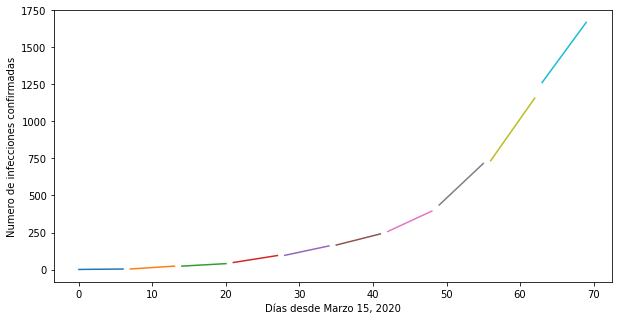

In [17]:
for i in range(0, len(matrices)):
    x = np.array(range(i * 7, (i * 7) + 7))
    y = matrices[i].row(1)[0] * x + matrices[i].row(0)[0]
    plt.plot(x,y)
plt.xlabel("Días desde Marzo 15, 2020")
plt.ylabel("Numero de infecciones confirmadas")
plt.show()

## Grafica con predicciones a mediano plazo

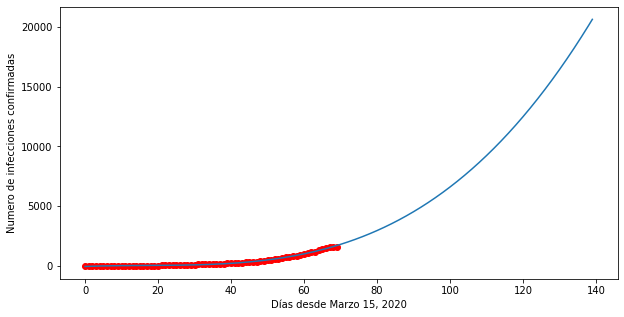

In [18]:
x = np.array(range(0,140))
x2 = np.array(range(0,70))
y2 = np.array(datos_sonora)
y = 0.0112 * x**3 - 0.5693 * x**2 + 11.3484 * x - 36.3333
plt.plot(x2,y2, 'ro')
plt.plot(x,y)
plt.xlabel("Días desde Marzo 15, 2020")
plt.ylabel("Numero de infecciones confirmadas")
plt.show()